In [1]:
library(tidyverse)
library(caret)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()
Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



# Données Iris
## Classification ascendante hiérarchique
1. Réalisez une première analyse des données. Vous semble-t-il nécessaire de procéder à une stan-dardisation des données ? Vous justifierez votre réponse.

In [2]:
data(iris)
X <- iris %>% select(-Species)
y <- factor(iris$Species)

In [3]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Il n'y a pas besoin de standardiser puisque les variables ont la même unité, sont de même échelle et ont même ordre de grandeur.

2. La fonction `hclust` permet de réaliser une CAH à partir d’une matrice de distance et pour plusieurs critères d’agrégation. Effectuer la classification hiérarchique des données iris en utilisant la distance euclidienne et le critère de `Ward`. Analyser les sorties du logiciel et tracer ledendrogramme correspondant (fonction `plot` appliquée à l’objet issu de `hclust`).

In [4]:
cah <- X %>%
dist() %>%
hclust("ward.D2")

cah


Call:
hclust(d = ., method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 150 


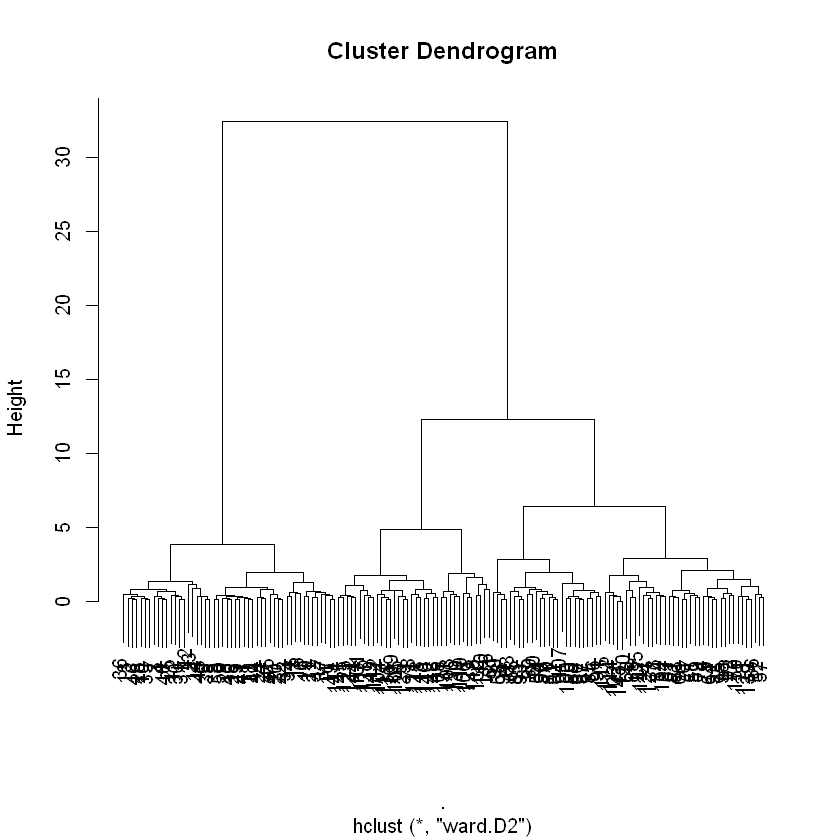

In [5]:
plot(cah)

3. Tracer la courbe de perte de l’inertie inter-classes. Combien de groupes choisiriez-vous ?

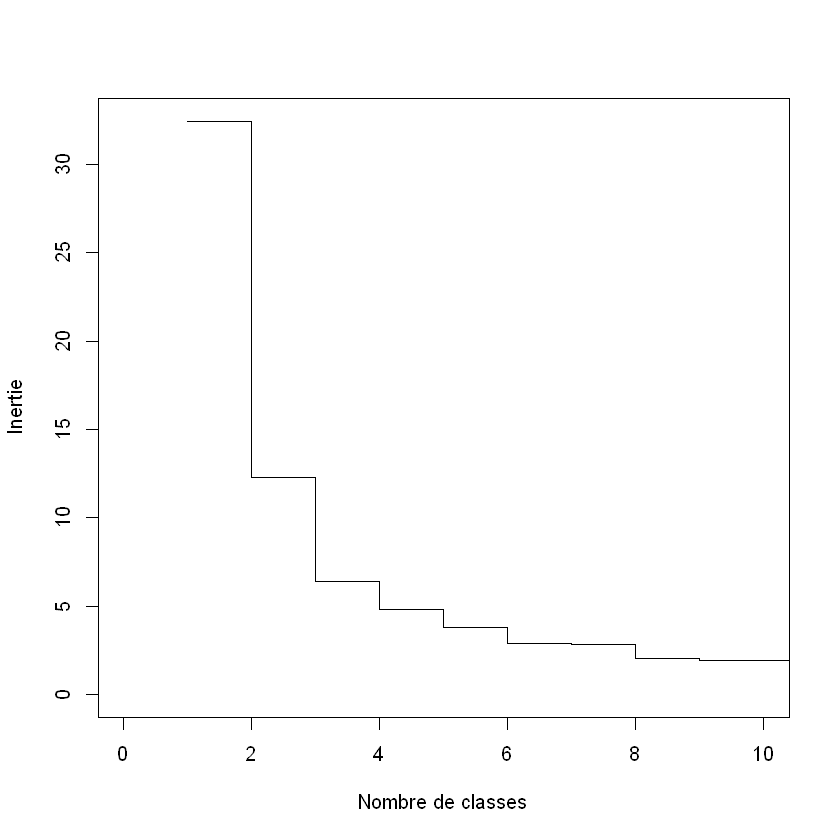

In [6]:
cah$height %>%
sort(decreasing = T) %>%
plot(type = 's',
     xlab = "Nombre de classes",
     ylab = "Inertie",
     xlim = c(0,10))

Afficherles groupes avec la fonction `cutree`.

In [7]:
cutree(cah, 3) %>%
questionr::freq()

n,%,val%
50,33.3,33.3
64,42.7,42.7
36,24.0,24.0


4. Faire apparaître les groupes sur le dendrogramme à l’aide de la fonction `rect.hclust`.

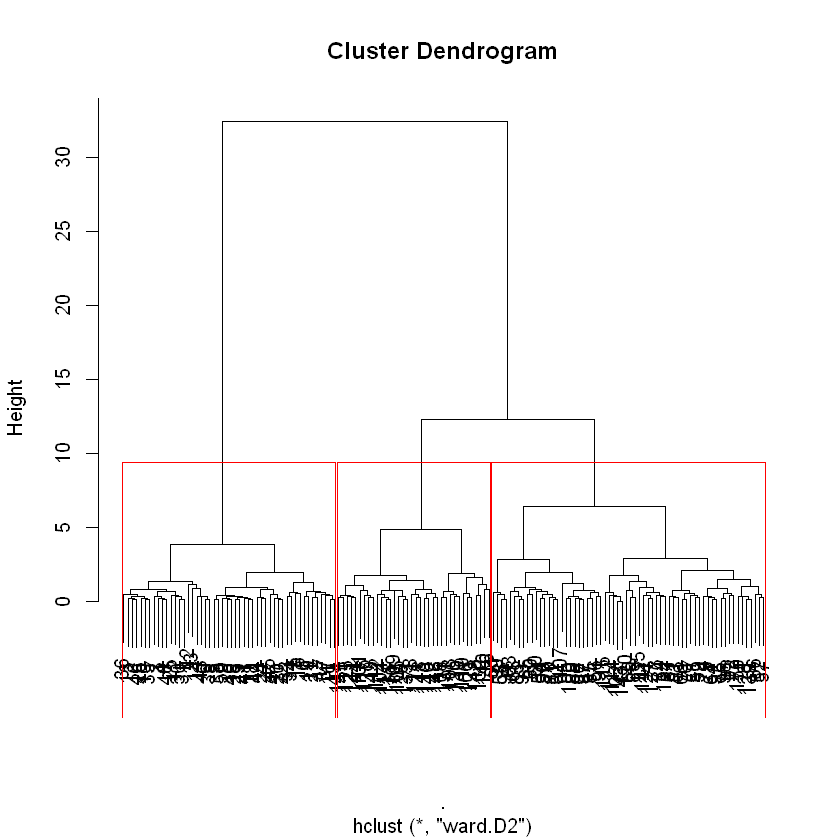

In [8]:
plot(cah)
rect.hclust(cah, 3)

4. Comparer la classification obtenue avec la variable Species. Commentez les résultats obtenus.

In [9]:
y_pred <- factor(cutree(cah, 3),
                 labels = c("setosa", "versicolor", "virginica"))

In [10]:
confusionMatrix(y_pred, y)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49        15
  virginica       0          1        35

Overall Statistics
                                          
               Accuracy : 0.8933          
                 95% CI : (0.8326, 0.9378)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.84            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9800           0.7000
Specificity                 1.0000            0.8500           0.9900
Pos Pred Value              1.0000            0.7656           0.9722
Neg Pred Value              1.0000            0.9884           0.8684
P

6. Représentez les résultats à l’aide de la fonction `clusplot`du package `cluster`. À quoi correspondcette représentation ?

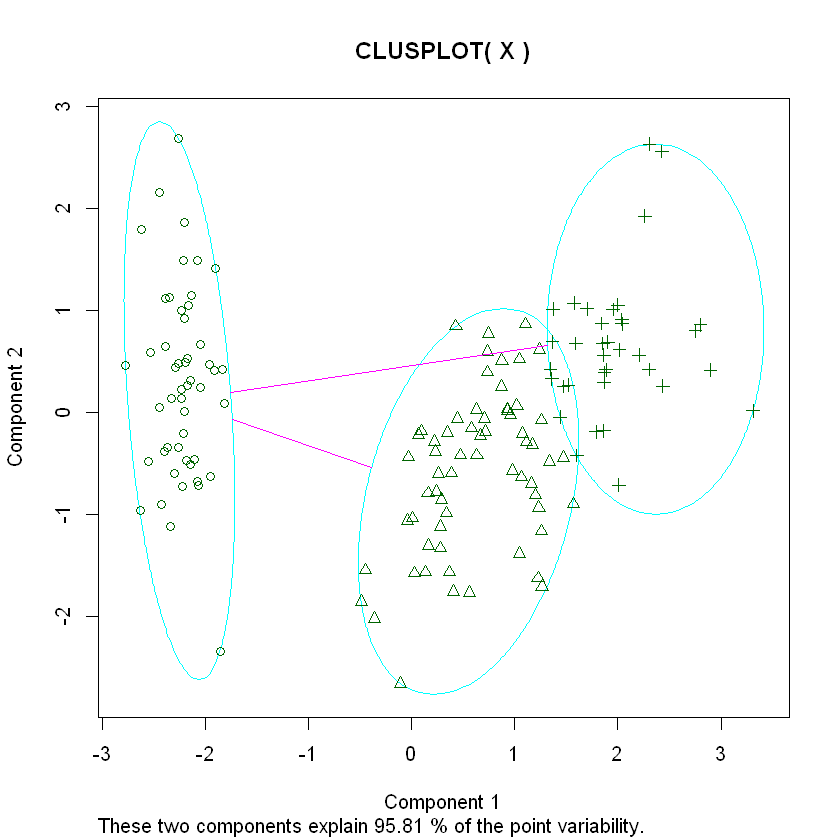

In [35]:
cluster::clusplot(
    X, y_pred
)

## Agrégation autour de centres mobiles
1. La fonction `kmeans` donne le résultat de l’algorithme d’agrégation autour des centres mobiles. En utilisant l’aide de la fonction, étudiez les principaux paramètres nécessaires à son utilisation.

2. Effectuer la partition des donnéesirisen 3 groupes. Analyser les sorties de la fonction et représenter les résultats à l’aide de graphiques appropriés.

3. Relancer plusieurs fois la procédure. Que constatez-vous ?

In [16]:
km <- kmeans(X, 3, algorithm = "MacQueen", nstart = 10)
km

K-means clustering with 3 clusters of sizes 38, 62, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.850000    3.073684     5.742105    2.071053
2     5.901613    2.748387     4.393548    1.433871
3     5.006000    3.428000     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
[112] 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
[149] 1 2

Within cluster sum of squares by cluster:
[1] 23.87947 39.82097 15.15100
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

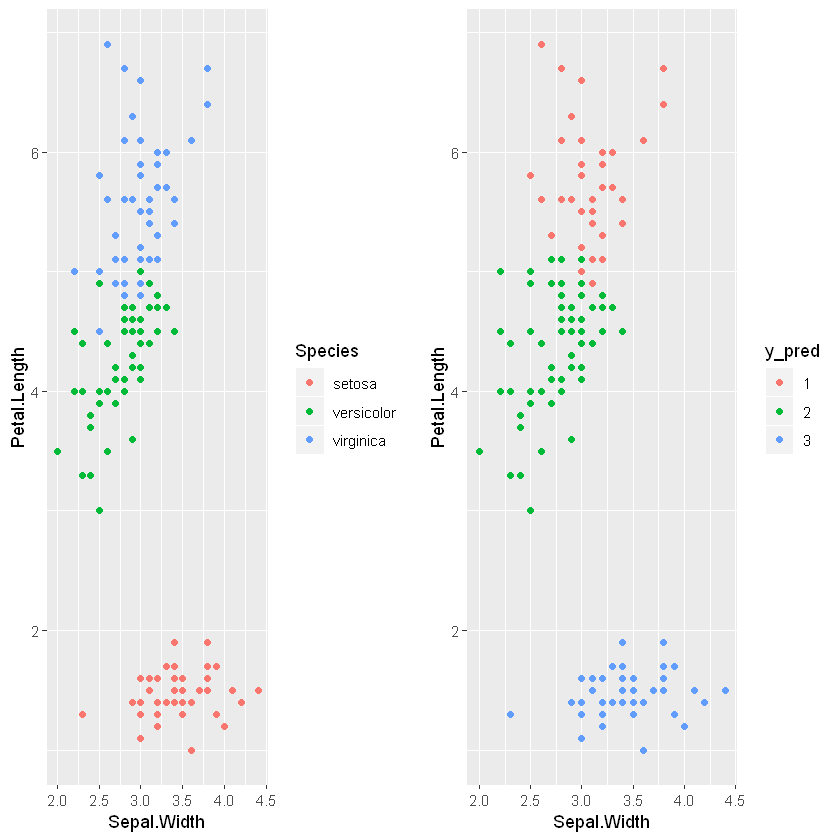

In [26]:
require(gridExtra)

pred <- iris %>%
bind_cols(y_pred = factor(km$cluster))

plot1 <- ggplot(pred) + aes(x = Sepal.Width, y = Petal.Length, color = Species) + geom_point()
plot2 <- ggplot(pred) + aes(x = Sepal.Width, y = Petal.Length, color = y_pred) + geom_point()
grid.arrange(plot1, plot2, ncol=2)

4. Programmer une fonction permettant de faire tourner l’algorithme avec 50 différentes initialisations et de retenir celle conduisant à la meilleure inertie intra-classes.

In [34]:
best.kmeans <- function(x, centers){
    return(kmeans(x, centers, nstart = 50))
}

# Données loup/chien
1. Faire les représentations graphiques des variables deux à deux. Par la suite, pour les représentations graphiques, on représentera LoC en fonction de LoM et LaM en fonction de LoM.

In [41]:
read_delim("../data/loup_chien.dat", delim = "	", na = c("?", "inconnu"))

Parsed with column specification:
cols(
  x = col_character(),
  LoC = col_double(),
  LoM = col_double(),
  LaM = col_double(),
  espece = col_character()
)


x,LoC,LoM,LaM,espece
loup1,23.4,15.0,19.1,loup
chien1,17.3,12.8,14.3,chien
chien2,20.5,13.7,16.6,chien
loup2,26.0,16.0,19.4,loup
chien3,20.5,14.4,17.7,chien
chien4,19.0,12.4,14.9,chien
chien5,19.7,13.2,14.0,chien
chien6,19.3,12.9,13.5,chien
chien7,20.5,14.3,15.5,chien
loup3,23.3,15.0,18.7,loup
